In [84]:
import numpy as np
import pandas as pd

import matplotlib 
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
%matplotlib inline

## Read Valdes time

In [54]:
simtime = pd.read_csv('data/combine_time.csv')
time_valdes = simtime[['clim']]

dt = -(time_valdes.clim.values[1:] - time_valdes.clim.values[0:-1])/2
ndt = np.zeros(len(dt)+1)
maxdt = np.zeros(len(dt)+1)
ndt[:-1] = dt
mindt = time_valdes.clim.values - ndt
maxdt[1:] = mindt[:-1]
maxdt[0] = time_valdes.clim.iloc[0]
maxdt[-1] = mindt[-2]
time_valdes['mindt'] = mindt.tolist() 
time_valdes['maxdt'] = maxdt.tolist()

time_valdes

/var/folders/n3/vd5l_ngx2hl52j9g7wgj3dqh0000gn/T/ipykernel_47158/2759751105.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_valdes['mindt'] = mindt.tolist()
/var/folders/n3/vd5l_ngx2hl52j9g7wgj3dqh0000gn/T/ipykernel_47158/2759751105.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_valdes['maxdt'] = maxdt.tolist()


,clim,mindt,maxdt
0,541,538.0,541.0
1,535,532.5,538.0
2,530,527.5,532.5
3,525,522.5,527.5
4,520,517.5,522.5
...,...,...,...
104,19,16.5,22.0
105,14,12.0,16.5
106,10,7.0,12.0
107,4,2.0,7.0


# Read PARED data

In [158]:
pared1 = pd.read_excel('data/PARED_version1.xlsx')
lonlat = pared1[['pal_lat_scotese','pal_long_scotese']]

In [201]:
pared = pd.read_csv('data/PARED_time_simple.csv')
# pared = pd.read_csv('data/PARED_time.csv')
# reducePared = pared[['biota_main','biota_sec','bin_midpoint','p_lng_PALEOMAP','p_lat_PALEOMAP']]
reducePared = pared[['name','biota_main','biota_sec','interval_mid_ma','r_number']]
reducePared.rename(columns={'interval_mid_ma': 'bin_midpoint'}, inplace=True)
reducePared['p_lng_PALEOMAP'] = lonlat['pal_long_scotese']
reducePared['p_lat_PALEOMAP'] = lonlat['pal_lat_scotese']
reducePared
# reducePared.iloc[2149]

/var/folders/n3/vd5l_ngx2hl52j9g7wgj3dqh0000gn/T/ipykernel_47158/3915688082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reducePared.rename(columns={'interval_mid_ma': 'bin_midpoint'}, inplace=True)
/var/folders/n3/vd5l_ngx2hl52j9g7wgj3dqh0000gn/T/ipykernel_47158/3915688082.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reducePared['p_lng_PALEOMAP'] = lonlat['pal_long_scotese']
/var/folders/n3/vd5l_ngx2hl52j9g7wgj3dqh0000gn/T/ipykernel_47158/3915688082.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,name,biota_main,biota_sec,bin_midpoint,r_number,p_lng_PALEOMAP,p_lat_PALEOMAP
0,Tilkideligi Tepe,Calcisponges,Stromatoporoids,217.75000,1,21.39770,9.828540
1,Hydra,Corals,Calcisponges,232.00000,2,20.92680,5.080330
2,"Shiraho, W-Pacific",Corals,Algae,0.00585,3,124.25000,24.333300
3,Aksu-Terziler area,Calcisponges,Stromatoporoids,232.00000,4,26.30430,-0.309389
4,"Adnet, Salzburg",Corals,Calcisponges,204.90000,5,16.42940,32.606900
...,...,...,...,...,...,...,...
4358,"core XK-1, Xisha carbonate platform on Shidao ...",Corals,Corals,21.73500,4374,112.68900,17.096900
4359,Jebel Serdj-Bargou,Corals,Rudists,119.00000,4375,13.10320,19.927400
4360,Cruz,Corals,Foraminifera,154.70000,4376,8.65899,32.483000
4361,Jaulin,Corals,Algae,154.70000,4377,8.62722,32.634600


In [202]:
for k in range(len(time_valdes)):
    reducePared.loc[(reducePared["bin_midpoint"]<=time_valdes['maxdt'].iloc[k])&
                    (reducePared["bin_midpoint"]>time_valdes['mindt'].iloc[k])
                    , "paleo_time"] = time_valdes['clim'].iloc[k]

/var/folders/n3/vd5l_ngx2hl52j9g7wgj3dqh0000gn/T/ipykernel_47158/1652923959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reducePared.loc[(reducePared["bin_midpoint"]<=time_valdes['maxdt'].iloc[k])&


In [203]:
dfPARE = reducePared[['r_number','name','biota_main','biota_sec','p_lng_PALEOMAP','p_lat_PALEOMAP',
                      "paleo_time"]].sort_values(by=['paleo_time']).reset_index(drop=True)

In [204]:
dfPARE = dfPARE[dfPARE['p_lng_PALEOMAP'].notna()]
dfPARE = dfPARE[dfPARE['p_lat_PALEOMAP'].notna()]
dfPARE = dfPARE[dfPARE['paleo_time'].notna()].reset_index(drop=True)
dfPARE

,r_number,name,biota_main,biota_sec,p_lng_PALEOMAP,p_lat_PALEOMAP,paleo_time
0,3985,Mitiaro,Corals,Algae,-157.67800,-19.83910,0.0
1,4061,Capo Colonna,Algae,Non-rudist bivalves,17.10810,39.09830,0.0
2,3963,Mogadishu coast,Corals,Algae,45.35960,2.06332,0.0
3,3971,"Oahu, Mokapu and Hahaione, Hawaii",Corals,Algae,-157.68200,21.42760,0.0
4,3812,"Irabu-jima, Okinawa",Corals,Algae,125.00500,24.92850,0.0
...,...,...,...,...,...,...,...
4305,1748,Jebel Daf,Microbes,Microbes,152.90700,-28.61950,530.0
4306,3032,Ch osan,Microbes,Microbes,150.36700,9.79838,530.0
4307,2802,"Rassokha River, Siberia",Microbes,Microbes,-8.16962,-28.81640,530.0
4308,2801,"Kotuy River, Siberia",Microbes,Microbes,-4.98291,-26.78230,530.0


In [207]:
dfPARE.rename(columns={'p_lng_PALEOMAP': 'lon', 'p_lat_PALEOMAP': 'lat', 
                       'biota_main': 'biota', 'biota_sec': 'type', 
                       'paleo_time':'time'}, inplace=True)

In [208]:
dfCoral = dfPARE.loc[dfPARE['biota'] == 'Corals'].reset_index(drop=True)
dfCoral

,r_number,name,biota,type,lon,lat,time
0,3985,Mitiaro,Corals,Algae,-157.6780,-19.83910,0.0
1,3963,Mogadishu coast,Corals,Algae,45.3596,2.06332,0.0
2,3971,"Oahu, Mokapu and Hahaione, Hawaii",Corals,Algae,-157.6820,21.42760,0.0
3,3812,"Irabu-jima, Okinawa",Corals,Algae,125.0050,24.92850,0.0
4,3811,"Key Largo to Dry Tortugas, Florida",Corals,Algae,-81.5732,24.66780,0.0
...,...,...,...,...,...,...,...
1744,2448,"Cliefden Caves, N.S.W.",Corals,Stromatoporoids,177.5660,16.63990,455.0
1745,1818,"Sinking Springs, Virginia",Corals,Microbes,-64.5555,-30.45430,465.0
1746,1816,"St. Jean, Quebec",Corals,Bryozoans,-54.9671,-27.83590,465.0
1747,1813,"Isle La Motte, Vermont",Corals,Bryozoans,-55.1741,-28.09120,465.0


In [211]:
dfPARE2 = dfPARE.sort_values(by=['r_number']).reset_index(drop=True)

dfPARE2.to_csv('data/PARED_paleomap_time2.csv',index=False)

In [212]:
dfPARE2

,r_number,name,biota,type,lon,lat,time
0,1,Tilkideligi Tepe,Calcisponges,Stromatoporoids,21.39770,9.828540,217.0
1,2,Hydra,Corals,Calcisponges,20.92680,5.080330,232.0
2,3,"Shiraho, W-Pacific",Corals,Algae,124.25000,24.333300,0.0
3,4,Aksu-Terziler area,Calcisponges,Stromatoporoids,26.30430,-0.309389,232.0
4,5,"Adnet, Salzburg",Corals,Calcisponges,16.42940,32.606900,204.0
...,...,...,...,...,...,...,...
4305,4374,"core XK-1, Xisha carbonate platform on Shidao ...",Corals,Corals,112.68900,17.096900,19.0
4306,4375,Jebel Serdj-Bargou,Corals,Rudists,13.10320,19.927400,121.0
4307,4376,Cruz,Corals,Foraminifera,8.65899,32.483000,154.0
4308,4377,Jaulin,Corals,Algae,8.62722,32.634600,154.0


In [178]:
timeslice = []
for i in range(0, len(dfPARE['time'])):    
    if dfPARE['time'][i] not in timeslice: 
        timeslice.append(dfPARE['time'][i])
        
timeslice2 = []
for i in range(0, len(dfCoral['time'])):    
    if dfCoral['time'][i] not in timeslice2: 
        timeslice2.append(dfCoral['time'][i])

In [179]:
pared_occurence = dfPARE['time'].value_counts().rename_axis('time').reset_index(name='counts').sort_values(by=['time'])

In [180]:
coral_occurence = dfCoral['time'].value_counts().rename_axis('time').reset_index(name='counts').sort_values(by=['time'])

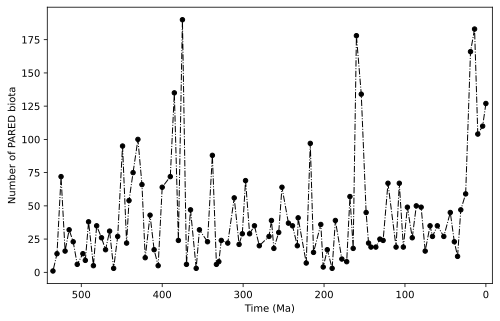

In [181]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(1,1,1) 

pared_occurence.plot(kind='scatter', x='time', y='counts', s=20, color='k',ax=ax)

pared_occurence.plot(kind='line',x='time',y='counts',ax=ax,linewidth = 1,
                    color = ['k'], linestyle = 'dashdot',legend=False)
ax.invert_xaxis()
ax.set_xlabel("Time (Ma)")
ax.set_ylabel("Number of PARED biota")
ax.set_xlim(542,-8)
plt.show()

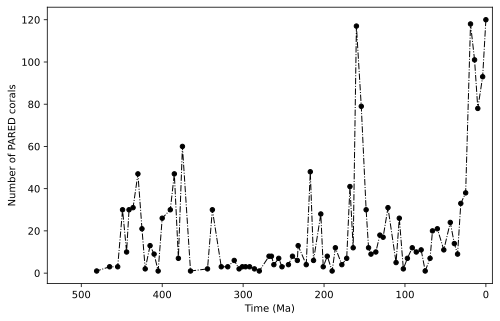

In [182]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(1,1,1) 

coral_occurence.plot(kind='scatter', x='time', y='counts', s=20, color='k',ax=ax)

coral_occurence.plot(kind='line',x='time',y='counts',ax=ax,linewidth = 1,
                    color = ['k'], linestyle = 'dashdot',legend=False)
ax.invert_xaxis()
ax.set_xlabel("Time (Ma)")
ax.set_ylabel("Number of PARED corals")
ax.set_xlim(542,-8)
plt.show()

+ Archaeocyaths: taxon of extinct, sessile, reef-building marine sponges that lived in warm tropical and subtropical waters

+ Bryozoans:  aquatic invertebrate animals, nearly all living in sedentary colonies, representing a mixed photozoan/heterozoan association

+ Serpulids:

+ Foraminifera: 



In [150]:
dfPARE['biota'].unique()

array(['Corals', 'Algae', nan, 'Bryozoans', 'Non-rudist bivalves',
       'Serpulids, worms, vermetids', 'Microbes', 'Foraminifera',
       'Calcisponges', 'Rudists', 'Siliceous sponges', 'Stromatoporoids',
       'Tubiphytes', 'Echinoderms', 'Brachiopods', 'Keratose Sponges',
       'Archaeocyaths'], dtype=object)